In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [2]:
df_A_NH2 = pd.read_csv("A//NH2.csv")
raman_shift = np.linspace(100, 4278, 2090)
df_full = df_A_NH2.T
df_full.loc[:,"Raman"] = raman_shift

df_A_COOH = pd.read_csv("A//COOH.csv")
raman_shift = np.linspace(100, 4278, 2090)
df_fullCOOH = df_A_COOH.T
df_fullCOOH.loc[:,"Raman"] = raman_shift

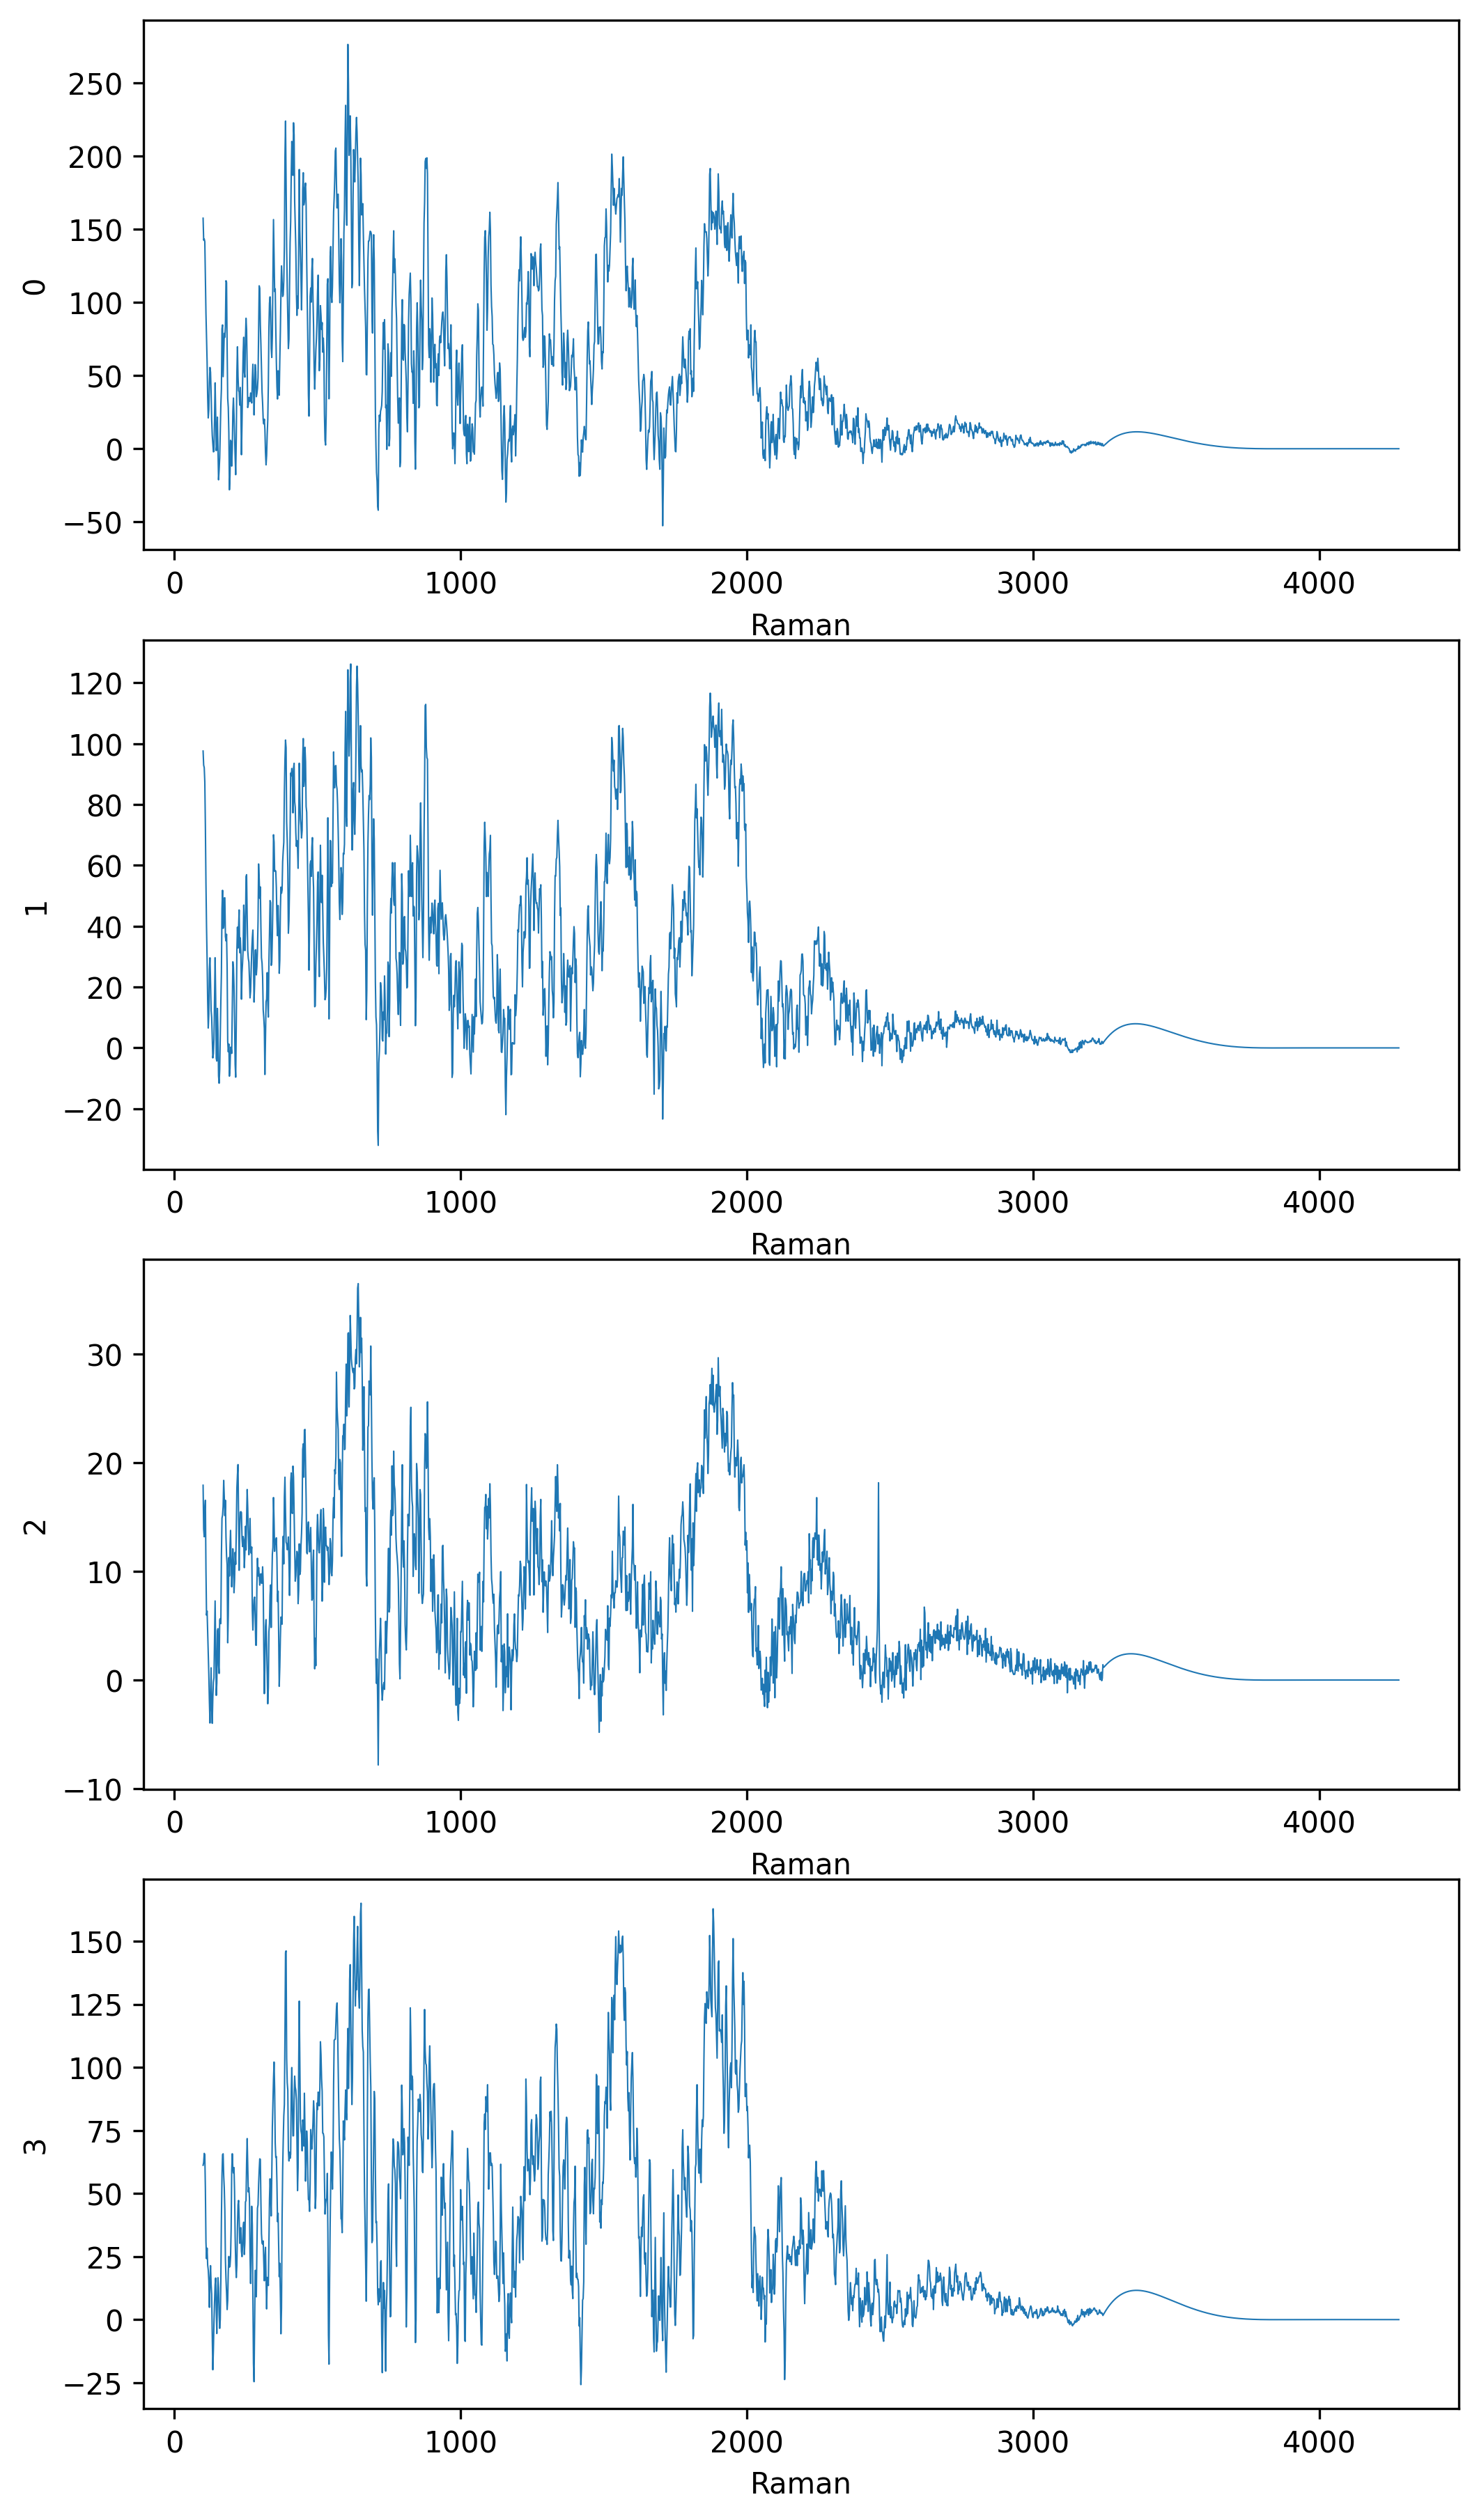

In [77]:
fig, ax = plt.subplots(4,1,figsize = (7, 12), dpi = 300)
fig.tight_layout(pad = 1.0)
for i in range(4):
    sns.lineplot(x = "Raman", y = df_full[i], data = df_full, ax = ax[i,], lw = 0.5)

In [4]:
raman_shift = np.linspace(100, 4278, 2090)

In [5]:
df_A_NH2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Columns: 2090 entries, 0 to 2089
dtypes: float64(2090)
memory usage: 963.5 KB


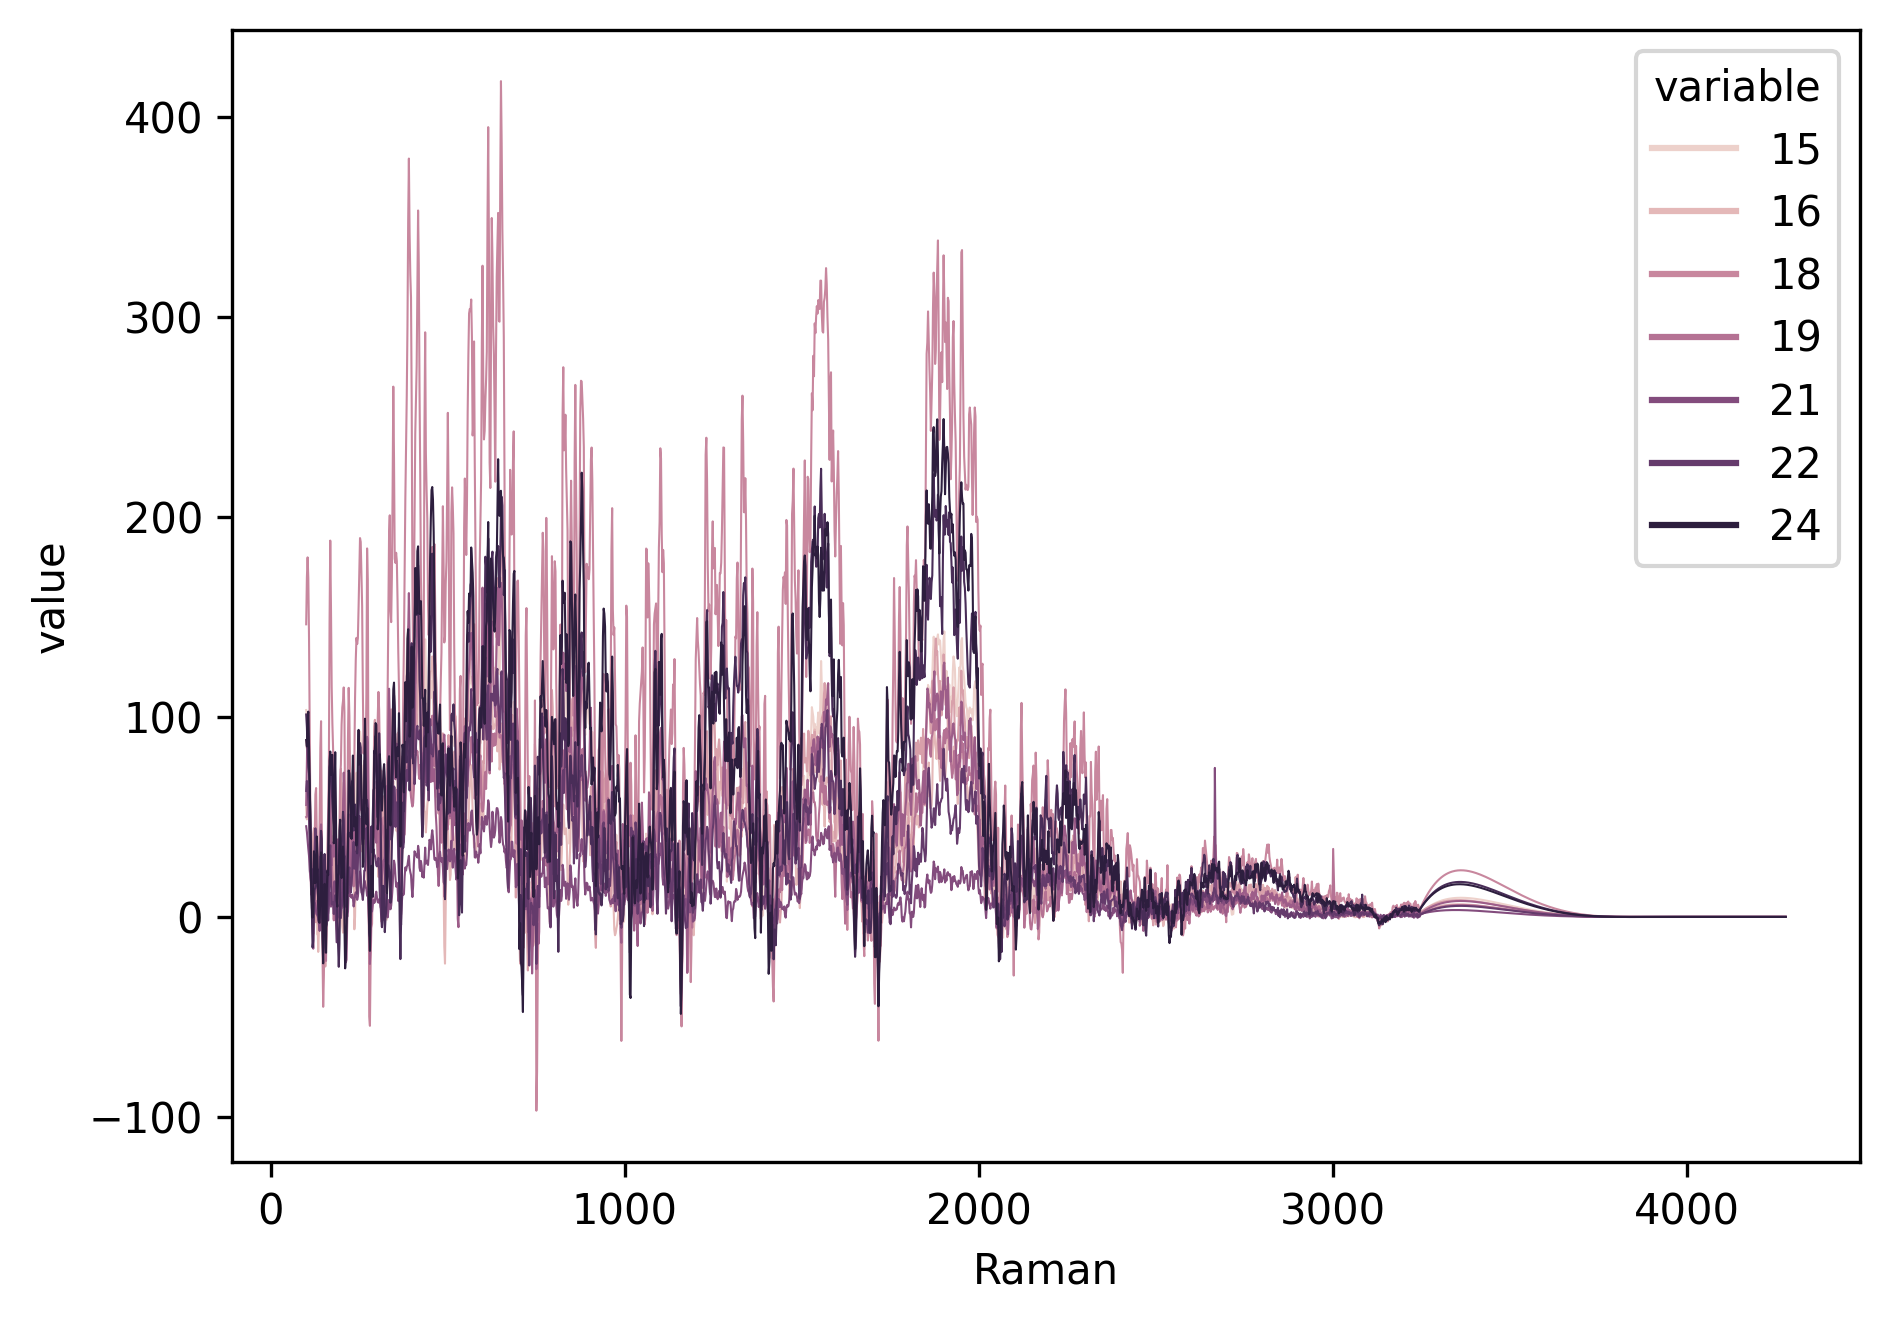

In [6]:
col_num = list(range(15, 25, 1))
col_num.append("Raman")

df_partial = pd.melt(df_full[col_num], id_vars = ['Raman'])

df_partial[df_partial["variable"] == 4].head()

fig, ax = plt.subplots(figsize = (7, 5), dpi = 300)
sns.lineplot(x = "Raman", y = "value", hue = "variable", data = df_partial, lw = 0.5)

plt.show()

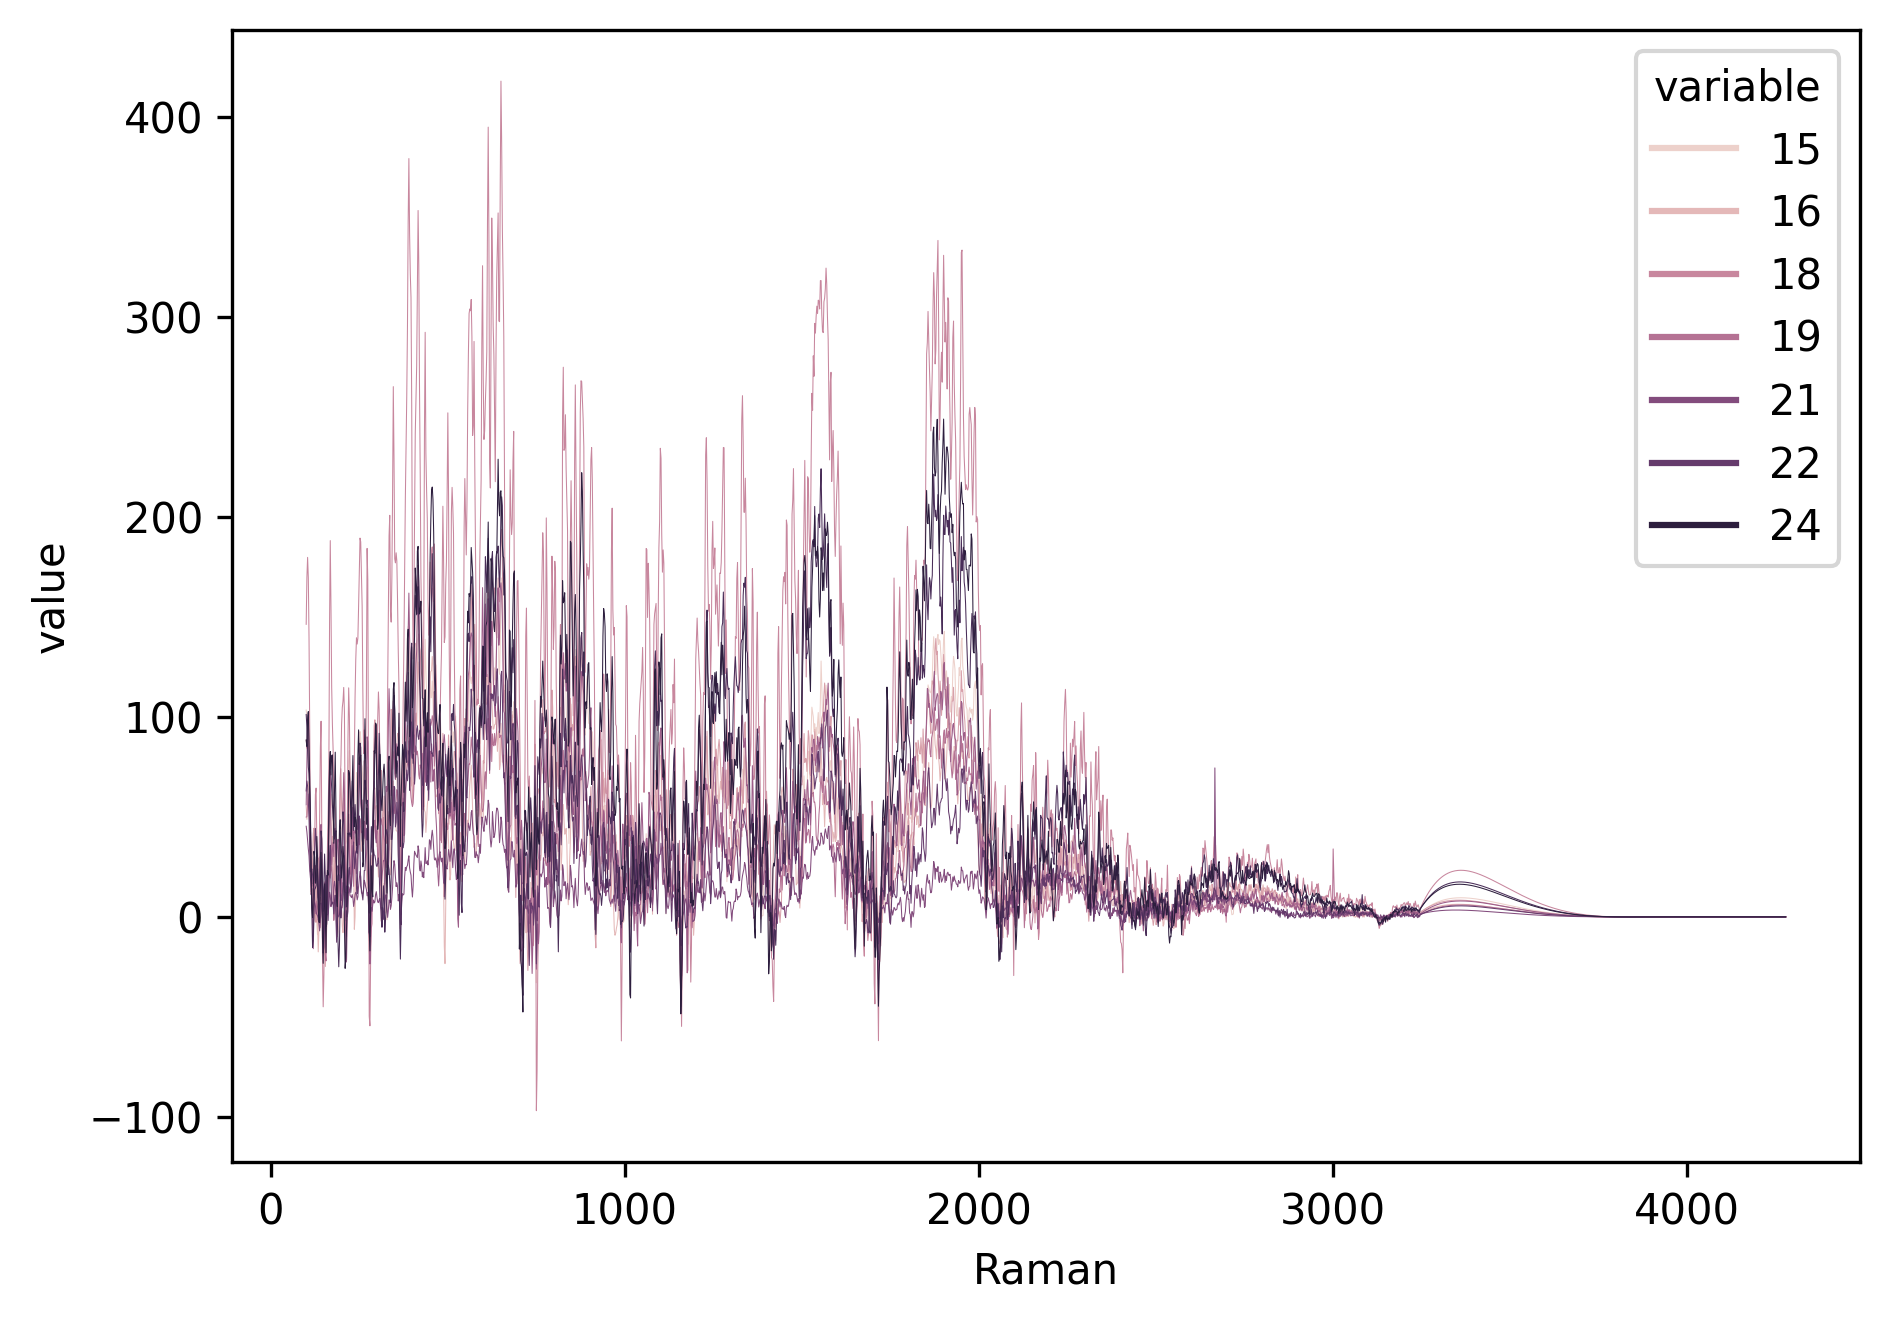

In [7]:
fig, ax = plt.subplots(figsize = (7, 5), dpi = 300)
sns.lineplot(x = "Raman", y = "value", hue = "variable", data = df_partial, lw = 0.25)
plt.show()

In [8]:
df_partial["variable"].unique()

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24], dtype=object)

In [9]:
a = list(range(5))
a.append("Raman")
print(a)

[0, 1, 2, 3, 4, 'Raman']


In [10]:
df_full.mean()

0          41.374607
1          22.937468
2           6.036491
3          30.818294
4          80.563326
5          58.453788
6          17.159027
7          60.249933
8          10.058689
9          18.473153
10         46.726643
11         36.935350
12         13.288982
13         10.366664
14         56.679441
15         28.979248
16         21.673756
17         30.461398
18         71.000396
19         19.990133
20         29.051871
21          8.941286
22         20.139394
23         40.363985
24         46.488297
25          9.621122
26         18.054809
27          5.760473
28         32.336676
29         88.422191
30         32.118931
31         18.125227
32         40.027668
33        106.510422
34         67.300287
35         51.850691
36         33.899247
37         35.384732
38          8.796612
39         25.244213
40         19.222747
41         52.696515
42          7.396536
43          5.902046
44         10.035941
45         65.081221
46         12.661365
47         28

In [11]:
df_chal = pd.read_table("/home/hk-user/Documents/Document_Backup/ST_518/data/Chal_Raman_Data_RAW_780nm.txt", delimiter = ",", skiprows = 9, header = None)

In [12]:
df_chal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2479 non-null   object 
 1   1       2478 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.9+ KB


In [13]:
df_chal = df_chal.rename(columns = {0:"Wave", 1: "Shift"})

In [14]:
rows_n = list(range(len(df_chal) - 1))
df_chal = df_chal.iloc[rows_n,]

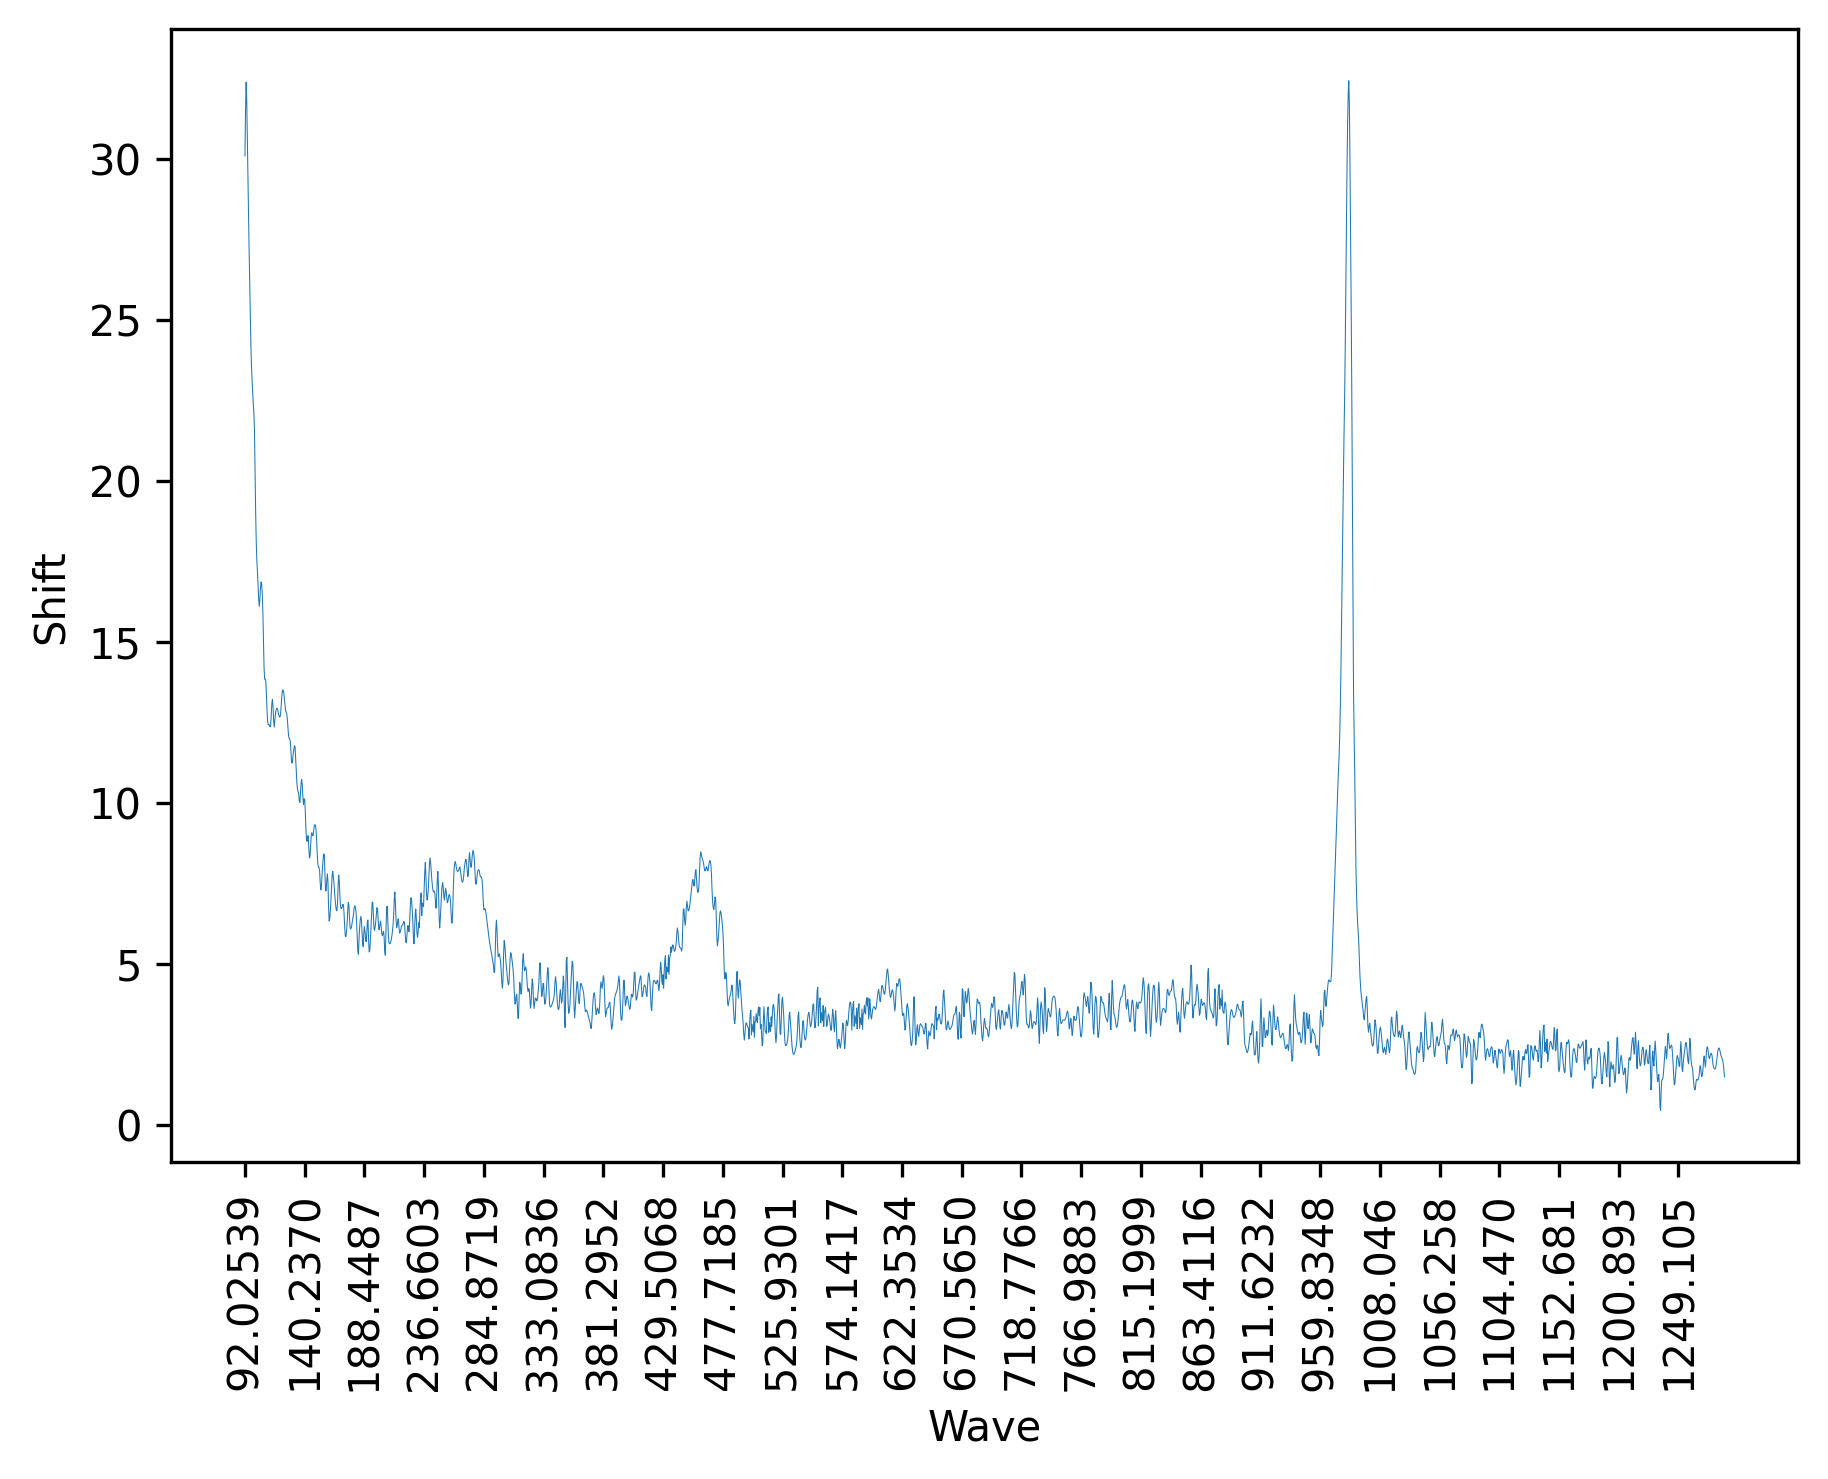

In [15]:
fig, ax = plt.subplots(figsize = (7, 5), dpi = 300)

x_marks = list(range(0, 2500, 100))

sns.lineplot(x = "Wave", y = "Shift", data = df_chal, lw = 0.25)
plt.xticks(x_marks, rotation ='vertical')

plt.show()

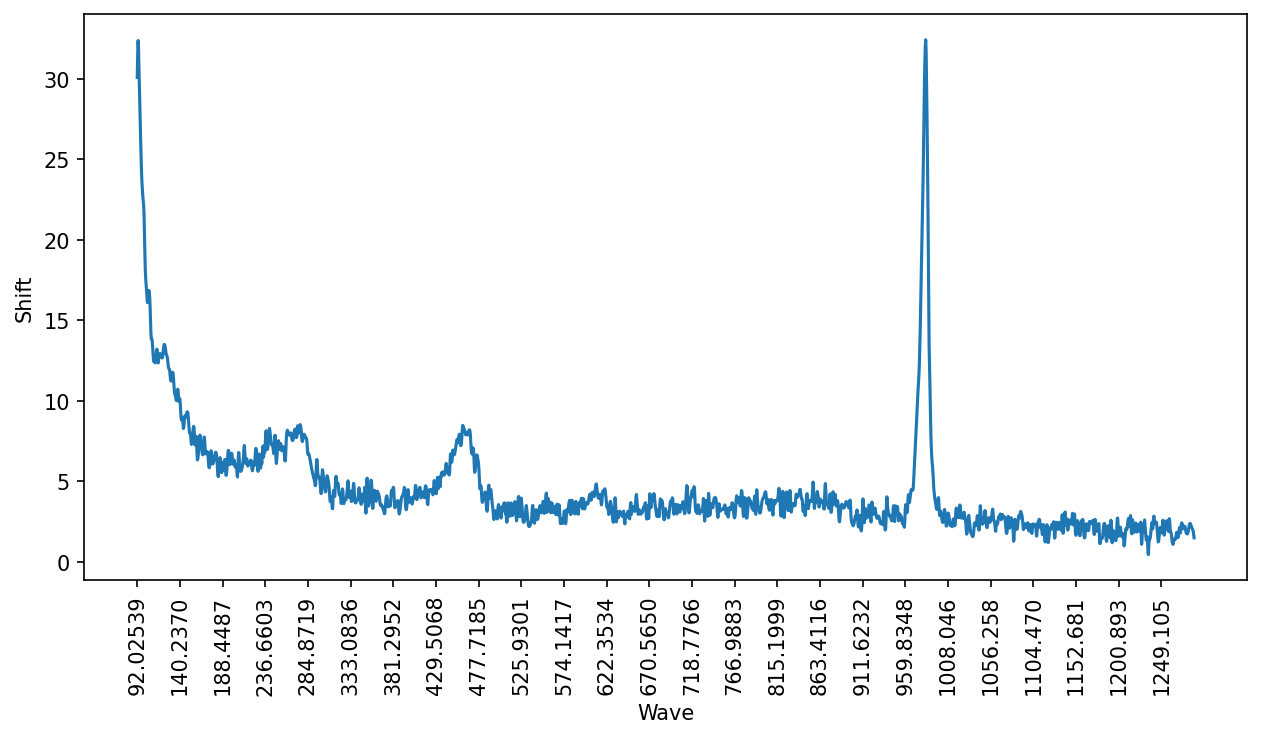

In [16]:
wave_list = df_chal.loc[:,"Wave"].tolist()

wave_list = list(map(float, wave_list))

fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)

x_marks = list(range(0, 2500, 100))

sns.lineplot(x = "Wave", y = "Shift", data = df_chal)
plt.xticks(x_marks, rotation = 'vertical')

plt.show()

In [17]:
df_chal.loc[:, "Wave"] = pd.to_numeric(df_chal.loc[:, "Wave"])

In [18]:
df_chal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wave    2478 non-null   float64
 1   Shift   2478 non-null   float64
dtypes: float64(2)
memory usage: 58.1 KB


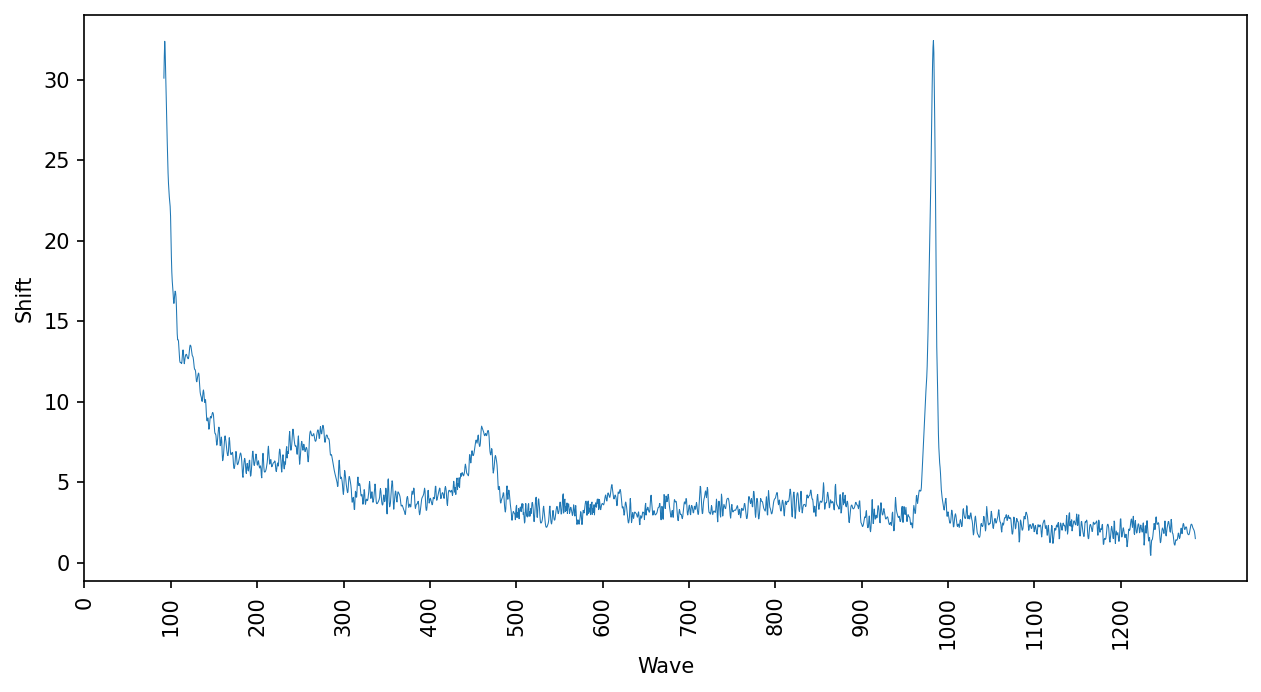

In [19]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)

x_marks = list(range(0, 1300, 100))

sns.lineplot(x = "Wave", y = "Shift", data = df_chal, lw = 0.5)
plt.xticks(x_marks, rotation = 'vertical')

plt.show()

In [32]:
df_chal["Log_Shift"] = np.log(df_chal["Shift"])
df_chal["Expo_Shift"] = np.exp(df_chal["Shift"])
df_chal["Power_Shift"] = 1.1**(df_chal["Shift"])

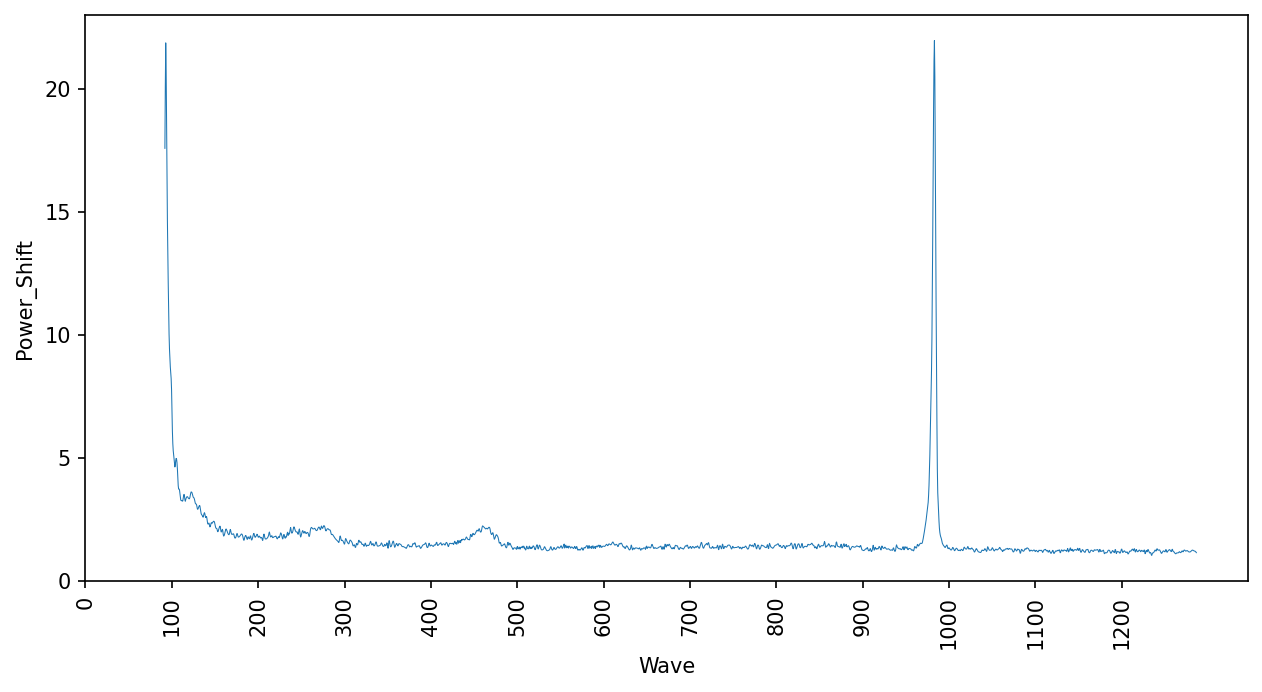

In [33]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)

x_marks = list(range(0, 1300, 100))

sns.lineplot(x = "Wave", y = "Power_Shift", data = df_chal, lw = 0.5)
plt.xticks(x_marks, rotation = 'vertical')

plt.show()

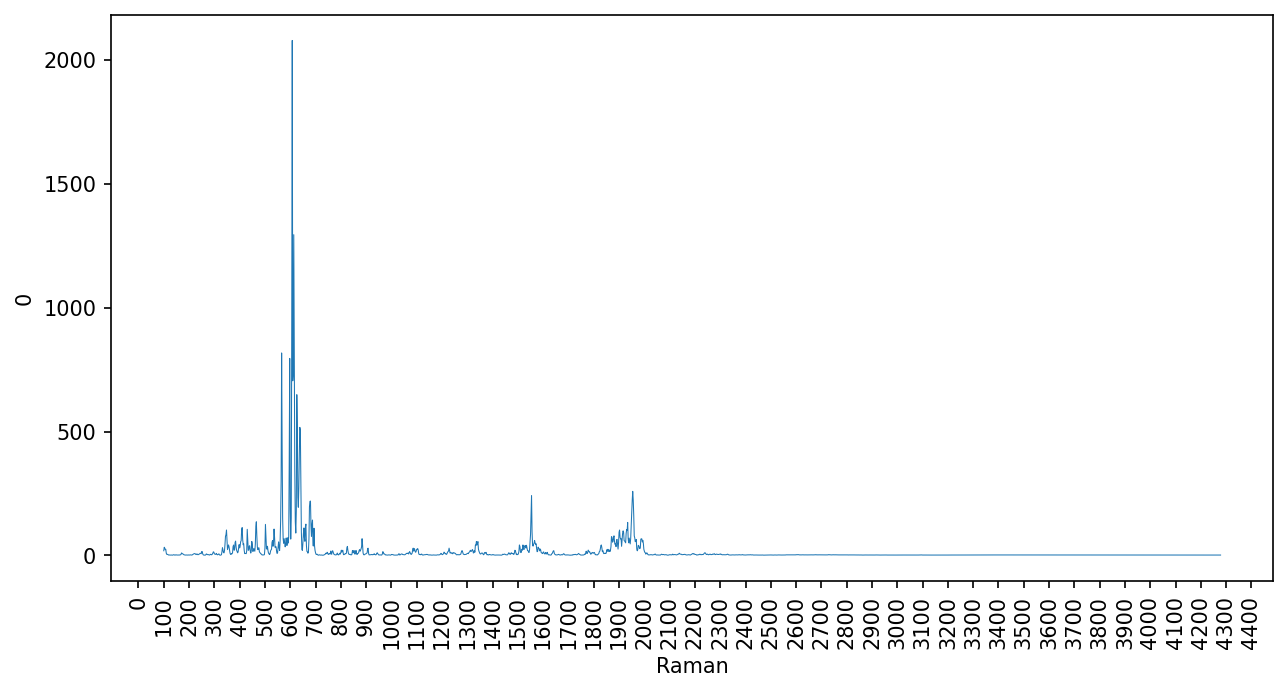

In [60]:
df_fullCOOH

fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)

x_marks = list(range(0, 4500, 100))

sns.lineplot(x = "Raman", y = 1.04**df_fullCOOH.iloc[:,0], data = df_fullCOOH, lw = 0.5)
plt.xticks(x_marks, rotation = 'vertical')

plt.show()

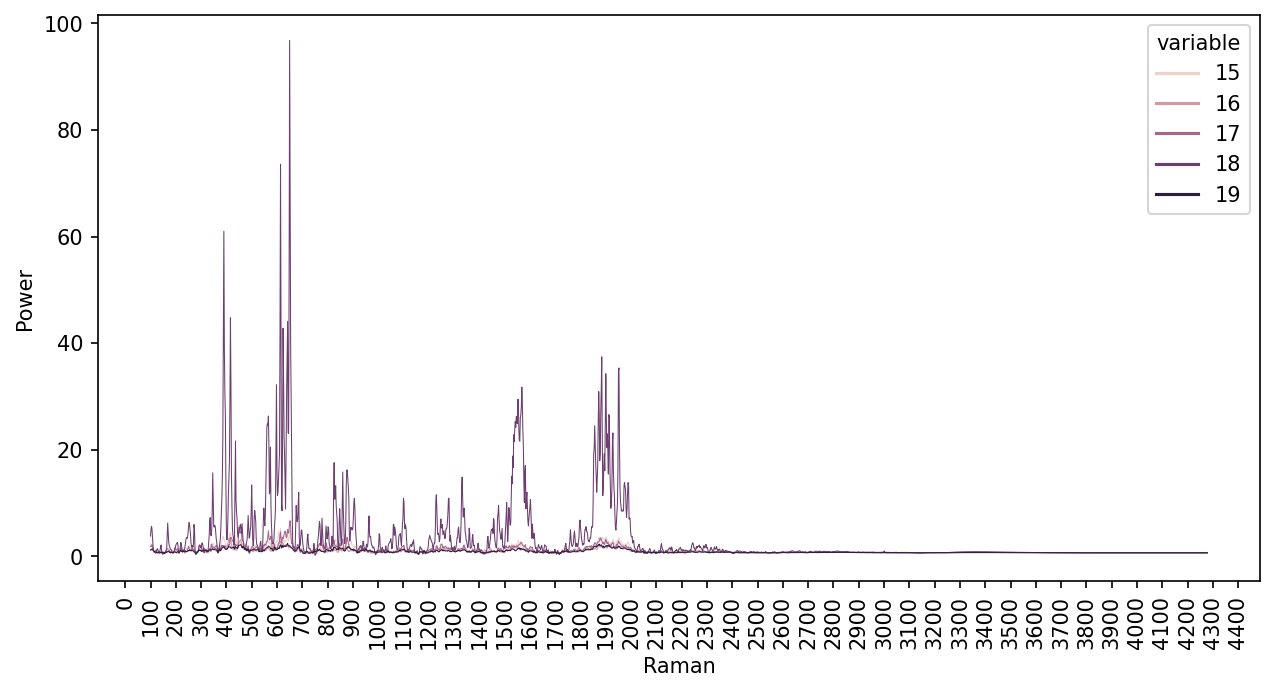

In [76]:
col_num = list(range(15, 20, 1))
col_num.append("Raman")

df_partial2 = pd.melt(df_full[col_num], id_vars = ['Raman'])

df_partial2["Power"] = 1.012**(df_partial2["value"] - df_partial2["value"].mean())

fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)

x_marks = list(range(0, 4500, 100))

sns.lineplot(x = "Raman", y = "Power", hue = "variable", data = df_partial2, lw = 0.5)
plt.xticks(x_marks, rotation = 'vertical')

plt.show()

In [75]:
df_partial2["value"].mean()

34.420986046274216

In [78]:
df_guanidine = pd.read_csv("random.csv")
df_guanidine.head()

,X,Y,y1,y2,y3,y4,y5,y6,y7,y8
0,200.931,2550.17,202.844,2377.89,204.757,2309.26,206.671,2277.44,NaN,NaN
1,208.584,2240.26,210.498,2181.03,212.411,2153.70,214.324,2083.13,216.238,2040.67
2,218.151,2003.68,220.064,1912.82,221.978,1918.39,223.891,1875.82,NaN,NaN
3,225.805,1873.69,227.718,1879.75,229.631,1836.65,231.545,1805.87,NaN,NaN
4,233.458,1805.06,235.371,1807.63,237.285,1783.70,239.198,1729.72,241.112,1727.29


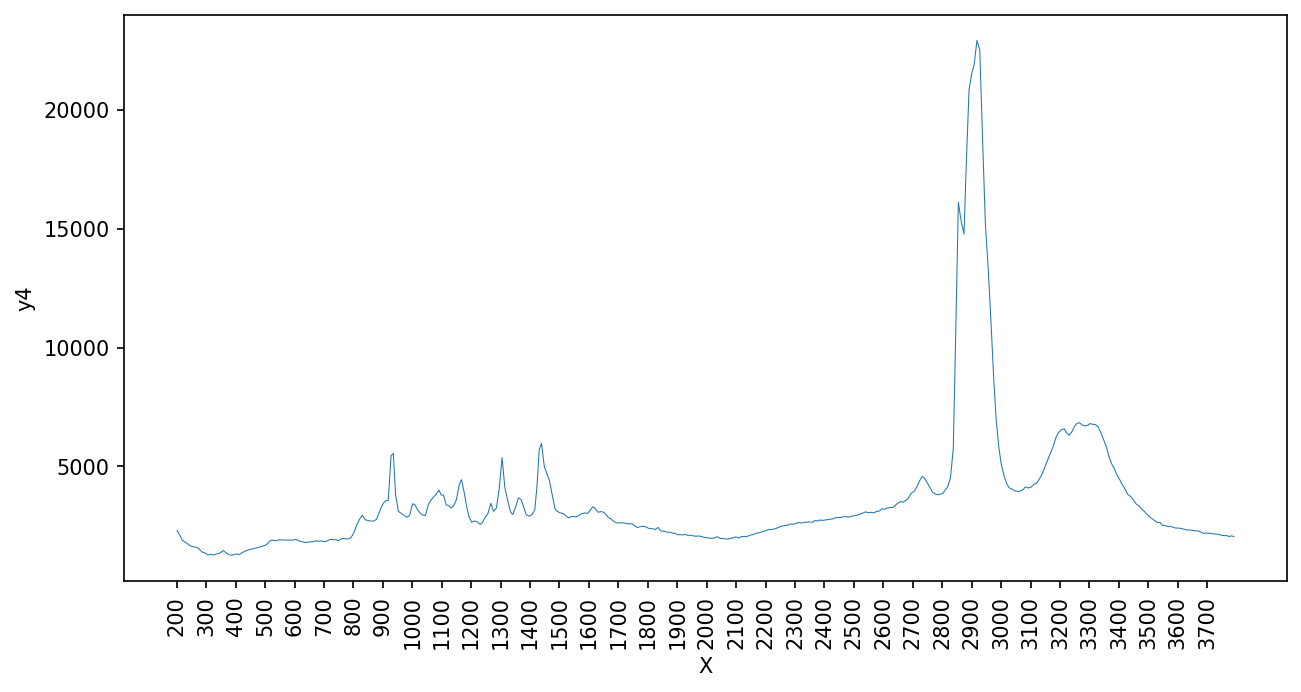

In [82]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 150)

x_marks = list(range(200, 3800, 100))

sns.lineplot(x = "X", y = "y4", data = df_guanidine, lw = 0.5)
plt.xticks(x_marks, rotation = 'vertical')

plt.show()